In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

heart = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart['sex'] = heart['sex'].apply(lambda s: 'M' if s == 1 else 'F')
heart.to_csv('heart_failure_clinical_records_dataset_new.csv')
heart.head()

In [3]:
death = heart[heart['DEATH_EVENT'] == 1]
alive = heart[heart['DEATH_EVENT'] == 0]

## Identifying differences in different columns between deceased and alive individuals.

In [4]:
# heart.groupby('DEATH_EVENT')[['platelets','creatinine_phosphokinase', 'serum_creatinine']].describe().transpose().round(2)

DEATH_EVENT                             0          1
platelets                count     203.00      96.00
                         mean   266657.49  256381.04
                         std     97531.20   98525.68
                         min     25100.00   47000.00
                         25%    219500.00  197500.00
                         50%    263000.00  258500.00
                         75%    302000.00  311000.00
                         max    850000.00  621000.00
creatinine_phosphokinase count     203.00      96.00
                         mean      540.05     670.20
                         std       753.80    1316.58
                         min        30.00      23.00
                         25%       109.00     128.75
                         50%       245.00     259.00
                         75%       582.00     582.00
                         max      5209.00    7861.00
serum_creatinine         count     203.00      96.00
                         mean        1.18       1.84
                         std         0.65       1.47
                         min         0.50       0.60
                         25%         0.90       1.08
                         50%         1.00       1.30
                         75%         1.20       1.90
                         max         6.10       9.40

#### There may be a significant difference in the creatinine levels of people who are alive and those who have passed away.

# Plot

1. need to create titles
2. need new labels
3. need new ticks for x axis
4. maybe give different colors for plots

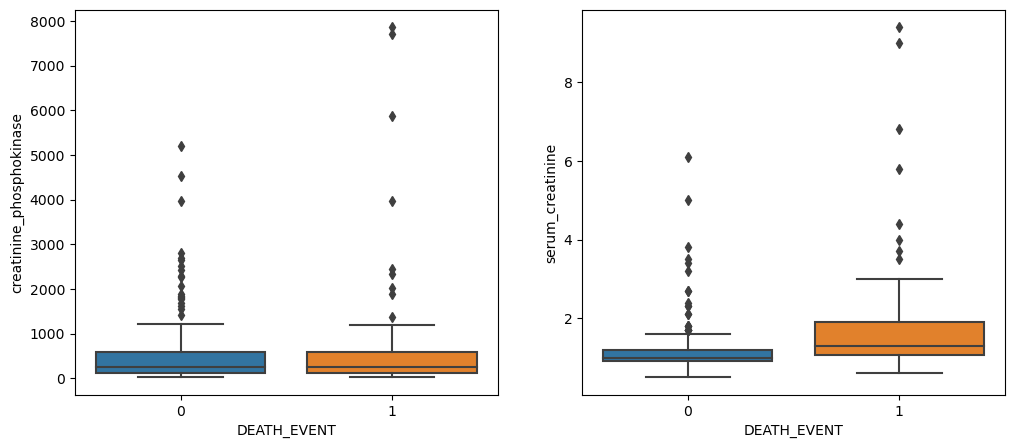

In [16]:
# Lets see how the boxplot differ

# creatinine phosphokinase
plt.figure(figsize=(12, 5))
ax1 = plt.subplot(1,2,1)
sns.boxplot(data=heart, x=heart.DEATH_EVENT, y=heart.creatinine_phosphokinase)

# serum_creatinine
ax2 = plt.subplot(1,2,2)
sns.boxplot(data=heart, x=heart.DEATH_EVENT, y=heart.serum_creatinine)
plt.show()

#### It appears that the serum creatine levels in individuals who have passed away are higher than those who are still alive. However, there does not seem to be a significant difference in creatinine phosphokinase levels. It is possible that the presence of outliers is causing the mean to be higher for deceased individuals. To obtain a clearer representation of the data, we need to view the box plot without the outliers.

In [22]:
# Creating a new data frame with by exculding outliers
def removeOutlier(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
    
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    
    return data[(data[col] > lower_range) & (data[col] < upper_range)]


In [26]:
creatinine_phos = removeOutlier(heart, 'creatinine_phosphokinase')
serum_creatinine = removeOutlier(heart, 'serum_creatinine')

# creatinine_phos_alive = creatinine_phos[creatinine_phos['DEATH_EVENT'] == 0]
# creatinine_phos_Death = creatinine_phos[creatinine_phos['DEATH_EVENT'] == 1]

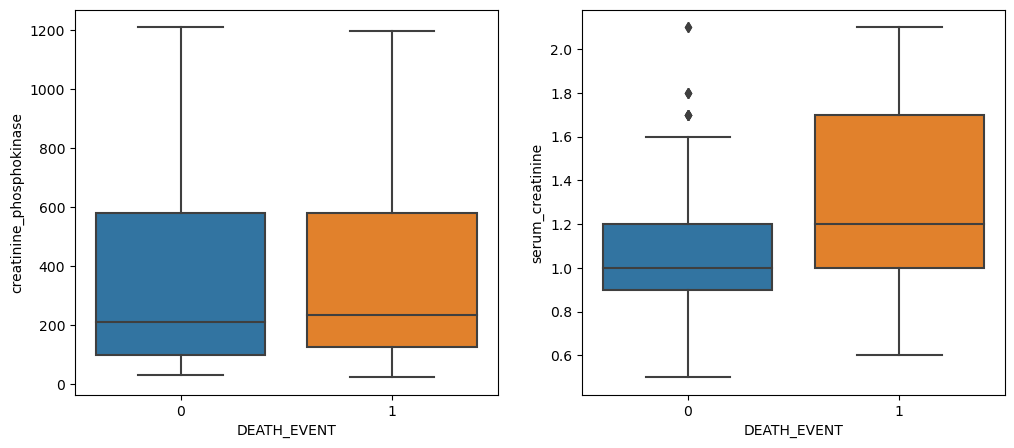

In [28]:
# creatinine phosphokinase
plt.figure(figsize=(12, 5))
ax1 = plt.subplot(1,2,1)
sns.boxplot(data=creatinine_phos, x=creatinine_phos.DEATH_EVENT, y=creatinine_phos.creatinine_phosphokinase)

# serum_creatinine
ax2 = plt.subplot(1,2,2)
sns.boxplot(data=serum_creatinine, x=serum_creatinine.DEATH_EVENT, y=serum_creatinine.serum_creatinine)
plt.show()

#### In general, there might be a noticeable variation in serum creatinine levels on average, so I plan to run a test using the R programming language. Although there doesn't seem to be any difference in creatinine phosphokinase, we will still investigate it. I'll also assess the variance to get a better understanding of the data.